In [14]:
import finesse
finesse.configure(plotting=True)

kat = finesse.Model()
kat.parse(
    """
    # Add a Laser named L0 with a power of 1 W.
    l L0 P=1
 
    # Space attaching L0 <-> m1 with length of 0 m (default).
    s s0 L0.p1 m1.p1

    # Input mirror of cavity.
    m m1 R=0.99 T=0.01

    # Intra-cavity space with length of 1 m.
    s CAV m1.p2 m2.p1 L=1

    # End mirror of cavity.
    m m2 R=0.991 T=0.009

    # Power detectors on reflection, circulation and transmission.
    pd refl m1.p1.o
    pd circ m1.p2.i
    pd trns m2.p2.o
    """
)

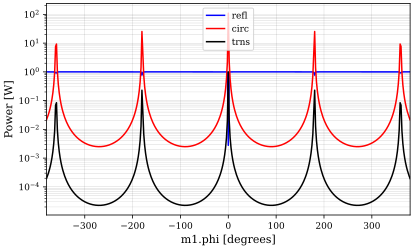

i am arthur
joooowwww


In [15]:
# Scan over the detuning DOF of m1 from -180 deg to +180 deg with 400 points.
out = kat.run("xaxis(m1.phi, lin, -380, 380, 400)")
out.plot(logy=True);
print('i am arthur')
print('joooowwww')

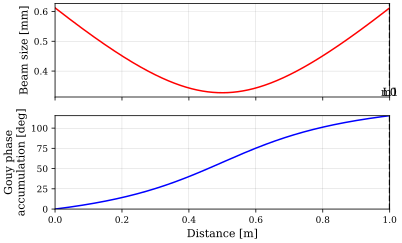

In [12]:
# Add some curvatures to our mirrors.
kat.m1.Rc = -0.7
kat.m2.Rc = 0.7

# Define the cavity.
kat.parse("cavity cavity1 source=m1.p2.o via=m2.p1.i priority=1")

# Plot the beam trace, starting from cavity the eigenmode.
tsy = finesse.tracing.tools.propagate_beam(
    to_node=kat.L0.p1.i, from_node=kat.m2.p1.o, direction="y"
)
tsy.plot();

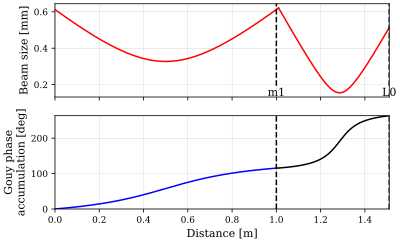

In [13]:
# Remove s0 so we can add in a lens.
# FIXME kat.remove is not yet working, so we use a list
# comprehension to remove s0 from the model and
# reparse it into a new model. (See unparse below)
kat2 = finesse.Model()
kat2.parse(
    "\n".join(
        [l for l in kat.unparse().splitlines() if "s0" not in l]
    )
)

# Add a silicon lens with an AR surface to the input coupler.
kat2.parse(
    """
    space s0 L0.p1 m1_AR.p1 L=0.5
    mirror m1_AR R=100e-6 L=10e-6 Rc=-0.3
    space s_M1_sub portA=m1_AR.p2 portB=m1.p1 L=10e-3 nr=3.5
    """
)

# Plot beam trace, starting from the cavity eigenmode.
tsy = finesse.tracing.tools.propagate_beam(
    to_node=kat2.L0.p1.i, from_node=kat2.m2.p1.o, direction="y"
)
tsy.plot();